In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def pixelize(row):
    return np.reshape(df.iloc[row:row+1,1:].to_numpy(), (28,28))

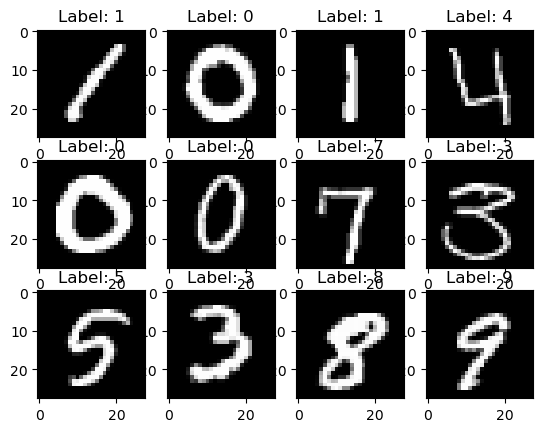

In [6]:
fig = plt.Figure(figsize=(12,16))

def show_image(row):
    pixels = pixelize(row)
    plt.subplot(3,4,row+1)
    img = plt.imshow(pixels, cmap='gray')
    ax = plt.gca()
    ax.set_title('Label: ' + str(df.iloc[row].label))
    return pixels, img

for i in range(12):
    show_image(i)
    
plt.show()



<AxesSubplot:>

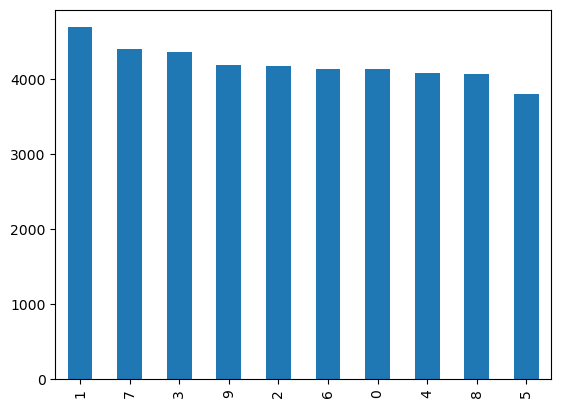

In [7]:
df.label.value_counts().plot.bar()

In [8]:
np.mean(df.drop(columns=['label']).loc[df.label == 1].to_numpy())

19.373043709371025

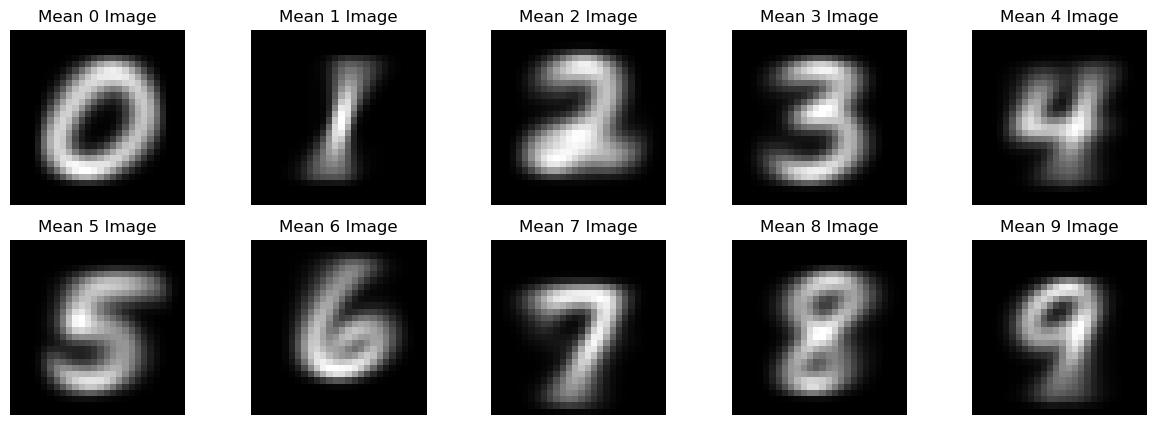

In [9]:
def mean_img(number, ax):
    mean = df.drop(columns=['label']).loc[df.label == number].mean().to_numpy()
    pixels =  np.reshape(mean, (28,28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title(f'Mean {number} Image')
    ax.axis('off')
    return mean
    

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

for i in range(10):
    mean_img(i, ax[i//5][i%5])



In [21]:
X_train, X_test, y_train, Y_test = train_test_split(df.drop(columns=['label']),df.label, test_size=.15, random_state=42)

<AxesSubplot:>

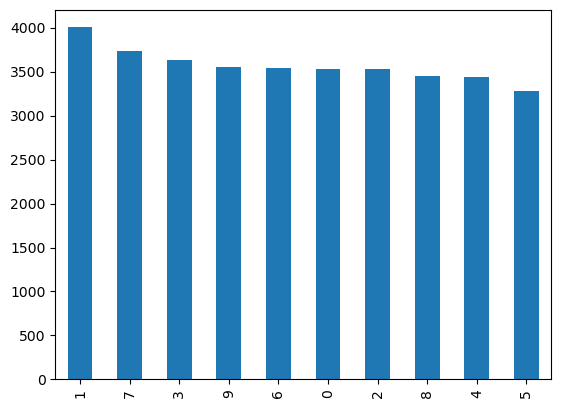

In [22]:
y_train.value_counts().plot.bar()

In [25]:
svc = SVC(class_weight='balanced',verbose=True)

params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'C':[.5,1,5,10]
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

grid.fit(X_train,y_train)

grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
*
optimization finished, #iter = 304
obj = -0.000016, rho = 0.840654
nSV = 48, nBSV = 0
*
optimization finished, #iter = 356
obj = -0.000014, rho = 0.776534
nSV = 58, nBSV = 0
*
optimization finished, #iter = 330
obj = -0.000014, rho = 1.144577
nSV = 56, nBSV = 0
*
optimization finished, #iter = 308
obj = -0.000015, rho = 0.743488
nSV = 53, nBSV = 0
*
optimization finished, #iter = 485
obj = -0.000015, rho = 0.724683
nSV = 60, nBSV = 0
*
optimization finished, #iter = 272
obj = -30.908396, rho = -0.520045
nSV = 174, nBSV = 72
*
optimization finished, #iter = 271
obj = -30.448884, rho = -0.507585
nSV = 173, nBSV = 72
*
optimization finished, #iter = 351
obj = -66.888671, rho = 0.745439
nSV = 281, nBSV = 203
*
optimization finished, #iter = 344
obj = -68.549291, rho = 0.716513
nSV = 278, nBSV = 206
*
optimization finished, #iter = 326
obj = -70.319958, rho = 0.714663
nSV = 278, nBSV = 206
....*
optimization finished, #iter = 3

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

........................................................................................................................................................................................................................................................................................................................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

...............................................................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

.......................................................................................*..................*
optimization finished, #iter = 14204
obj = -0.000674, rho = 1.276072
nSV = 233, nBSV = 0
.............................................................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

..................................................................................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

..................................................................................................................................................................*
optimization finished, #iter = 290
obj = -28.674709, rho = -0.552700
nSV = 166, nBSV = 59
.......................................................................................................................................................................................................................................................................................................*.....*
optimization finished, #iter = 4757
obj = -0.000228, rho = -0.562066
nSV = 164, nBSV = 0
..........................................................................................................................................................................*
optimization finished, #iter = 268
obj = -29.571740, rho = -0.522614
nSV = 166, nBSV = 66
............................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................*
optimization finished, #iter = 788
obj = -118.051680, rho = -0.042571
nSV = 487, nBSV = 281
............................................................................................................................................................................................................................................................................................................................................................................................................................................................*
opti

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/mitchellkrieger/opt/anaconda3/lib/python3

.........................................................................................*
optimization finished, #iter = 536
obj = -84.090948, rho = 1.145661
nSV = 348, nBSV = 221
.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*......*
optimization finished, #iter = 574
obj = -165.480659, rho = 12.228039
nSV = 292, nBSV = 279
.....................................*
optimization finished, #iter = 517
obj = -92.857596, rho = 1.074060
nSV = 367, nBSV = 245
................

KeyboardInterrupt: 